In [2]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [3]:
merge_df = pd.merge(city_df, ride_df, on="city")
merge_df = merge_df.rename(columns={"type": "city_type"})
merge_df.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
urban_fare = []
urban_driver_count = []
rural_fare = []
rural_driver_count = []
suburban_fare = []
suburban_driver_count = []
counter = 0

for city_type in merge_df["city_type"]:
    if city_type == "Urban":
        urban_fare.append(merge_df["fare"][counter])
        urban_driver_count.append(merge_df["driver_count"][counter])
    elif city_type == "Rural":
        rural_fare.append(merge_df["fare"][counter])
        rural_driver_count.append(merge_df["driver_count"][counter])
    else:
        suburban_fare.append(merge_df["fare"][counter])
        suburban_driver_count.append(merge_df["driver_count"][counter])
        
    counter += 1

<IPython.core.display.Javascript object>


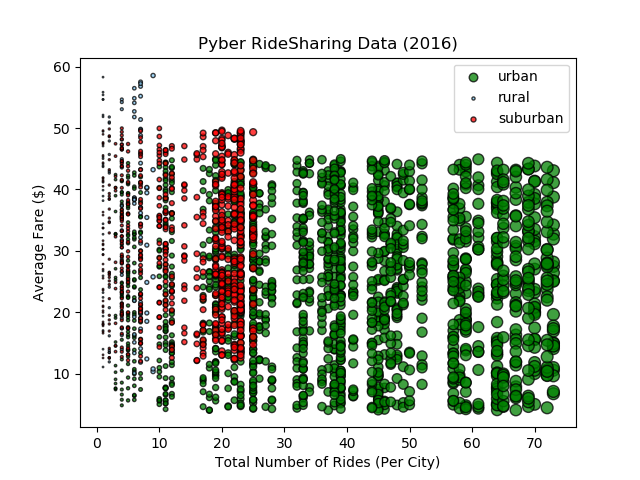

In [25]:
# Obtain the x and y coordinates for each of the three city types

plt.title("Pyber RideSharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Urban
plt.scatter(urban_driver_count, urban_fare, marker="o",facecolors="green", edgecolors="black", s=urban_driver_count, alpha=0.75, label="urban")
#Rural
plt.scatter(rural_driver_count, rural_fare, marker="o",facecolors="lightskyblue", edgecolors="black", s=rural_driver_count, alpha=0.75, label="rural")
#Suburban
plt.scatter(suburban_driver_count, suburban_fare, marker="o", facecolors="red", edgecolors="black", s=suburban_driver_count, alpha=0.75, label="suburban")

plt.legend(loc="upper right")
# Saving figure
plt.savefig("Images/Pyber Ride Sharing Data.png")
plt.show()